# Formation Machine Learning: Les arbres de décision

In [1]:
#Importer les librairies nécessaires
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 

In [3]:
#Charger les données
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5] 

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
#Extraire les attributs de description
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5] 

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [7]:
#Conversion des données.
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 

In [10]:
le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

In [11]:
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

In [12]:
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [13]:
#Identifier l’attribut target
y = my_data["Drug"]
y[0:5] 

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [16]:
#Construction de l’arbre
from sklearn.model_selection import train_test_split 
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3) 

In [18]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters
drugTree.fit(X_trainset,y_trainset) 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [19]:
#Prédiction
predTree = drugTree.predict(X_testset) 
print (predTree [0:5])
print (y_testset [0:5]) 

['drugY' 'drugB' 'drugY' 'drugA' 'drugX']
192    drugY
64     drugB
94     drugY
187    drugA
44     drugX
Name: Drug, dtype: object


In [20]:
#Evaluation du modèle.
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9666666666666667


[Text(209.25, 195.696, 'X[4] <= 14.638\nentropy = 1.944\nsamples = 140\nvalue = [12, 12, 12, 40, 64]'),
 Text(167.4, 152.208, 'X[2] <= 0.5\nentropy = 1.749\nsamples = 76\nvalue = [12, 12, 12, 40, 0]'),
 Text(83.7, 108.72, 'X[0] <= 51.5\nentropy = 1.0\nsamples = 24\nvalue = [12, 12, 0, 0, 0]'),
 Text(41.85, 65.232, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0, 0, 0, 0]'),
 Text(125.55000000000001, 65.232, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12, 0, 0, 0]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 1.5\nentropy = 0.779\nsamples = 52\nvalue = [0, 0, 12, 40, 0]'),
 Text(209.25, 65.232, 'X[3] <= 0.5\nentropy = 0.999\nsamples = 25\nvalue = [0, 0, 12, 13, 0]'),
 Text(167.4, 21.744, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0, 0]'),
 Text(251.10000000000002, 21.744, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 0, 13, 0]'),
 Text(292.95, 65.232, 'entropy = 0.0\nsamples = 27\nvalue = [0, 0, 0, 27, 0]'),
 Text(251.10000000000002, 152.208, 'entropy = 0.0\nsamples = 64\nvalue = [0, 0,

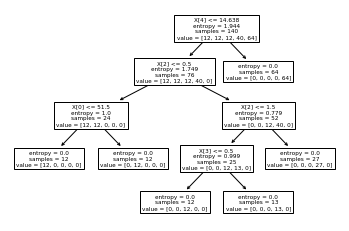

In [22]:
from sklearn import tree
tree.plot_tree(drugTree)